<a href="https://colab.research.google.com/github/jiwoochris/toys/blob/main/sat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국 교육과정 평가원 대학 수학 능력 시험 표준점수-도수분포 데이터 분석 & 시각화

데이터셋 : https://www.data.go.kr/data/15080195/fileData.do

위 데이터를 다운 받아서 2022년도 수능 성적을 분석해봅시다.

In [ ]:
import pandas as pd
import gdown

# 파일의 공유 링크에서 파일 ID 추출
file_id = '1IPsaawJuUC4aSjwcmwzQhmPrRqEM90ZG'
url = f'https://drive.google.com/uc?id={file_id}'

# gdown을 사용하여 파일 다운로드
gdown.download(url, 'local_filename.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1IPsaawJuUC4aSjwcmwzQhmPrRqEM90ZG
To: /content/local_filename.csv
100%|██████████| 33.1k/33.1k [00:00<00:00, 24.8MB/s]


'local_filename.csv'

In [ ]:
# 다운로드한 파일로부터 데이터 로드
data = pd.read_csv('local_filename.csv', encoding='CP949')# 인코딩 옵션으로 'CP949' 사용

# 데이터셋의 처음 몇 행을 표시
print(data.head())

   영역  유형  표준점수    남자   여자
0  국어  국어   134   218  153
1  국어  국어   133   469  284
2  국어  국어   132   135  109
3  국어  국어   131  1053  660
4  국어  국어   130  1135  769


**데이터 시각화**

국어 과목에서 상위 1%에 어떤 성별이 더 많은지

In [ ]:
# 한국어 과목에 대한 데이터 필터링
korean_data = data[data['유형'] == '국어']

# 총 학생 수 계산
total_students = korean_data['남자'].sum() + korean_data['여자'].sum()

# 상위 1% 임계값 결정
one_percent_threshold = total_students * 0.01

# 표준점수 기준으로 내림차순 정렬하여 상위 1% 찾기
sorted_korean_data = korean_data.sort_values(by='표준점수', ascending=False)

# 학생들의 누적 합계
sorted_korean_data['cumulative_sum'] = sorted_korean_data['남자'] + sorted_korean_data['여자']
sorted_korean_data['cumulative_sum'] = sorted_korean_data['cumulative_sum'].cumsum()

# 누적 합계가 1% 임계값을 넘는 행 찾기
threshold_row = sorted_korean_data[sorted_korean_data['cumulative_sum'] >= one_percent_threshold].iloc[0]
threshold_score = threshold_row['표준점수']

# 상위 1%에 속하는 남학생과 여학생의 수 계산
top_1_percent_data = sorted_korean_data[sorted_korean_data['표준점수'] >= threshold_score]
males_in_top_1_percent = top_1_percent_data['남자'].sum()
females_in_top_1_percent = top_1_percent_data['여자'].sum()

threshold_score, males_in_top_1_percent, females_in_top_1_percent

(130, 3010, 1975)

국어 과목에서 남녀의 평균 점수

In [ ]:
# 한국어 과목에서 남학생과 여학생의 가중 평균 점수 계산
male_weighted_sum = (korean_data['남자'] * korean_data['표준점수']).sum()
female_weighted_sum = (korean_data['여자'] * korean_data['표준점수']).sum()

# 총 남학생 수와 여학생 수 계산
total_males = korean_data['남자'].sum()
total_females = korean_data['여자'].sum()

# 남학생과 여학생의 평균 점수 계산
average_male_score = male_weighted_sum / total_males
average_female_score = female_weighted_sum / total_females

average_male_score, average_female_score

(227763, 218280)

국어 과목에서 하위 1%에 어떤 성별이 더 많은지

In [ ]:
# 한국어 과목에 대한 데이터 필터링
korean_data = data[data['유형'] == '국어']

# 총 학생 수 계산
total_students = korean_data['남자'].sum() + korean_data['여자'].sum()

# 하위 1% 임계값 결정
one_percent_threshold = total_students * 0.01

# 표준점수 기준으로 내림차순 정렬하여 하위 1% 찾기
sorted_korean_data = korean_data.sort_values(by='표준점수', ascending=True)

# 학생들의 누적 합계
sorted_korean_data['cumulative_sum'] = sorted_korean_data['남자'] + sorted_korean_data['여자']
sorted_korean_data['cumulative_sum'] = sorted_korean_data['cumulative_sum'].cumsum()

# 누적 합계가 1% 임계값을 넘는 행 찾기
threshold_row = sorted_korean_data[sorted_korean_data['cumulative_sum'] >= one_percent_threshold].iloc[0]
threshold_score = threshold_row['표준점수']

# 하위 1%에 속하는 남학생과 여학생의 수 계산
bottom_1_percent_data = sorted_korean_data[sorted_korean_data['표준점수'] <= threshold_score]
males_in_bottom_1_percent = bottom_1_percent_data['남자'].sum()
females_in_bottom_1_percent = bottom_1_percent_data['여자'].sum()

threshold_score, males_in_bottom_1_percent, females_in_bottom_1_percent

(52, 3476, 2020)

과목별 남녀 표준 점수 분포를 확인한다.

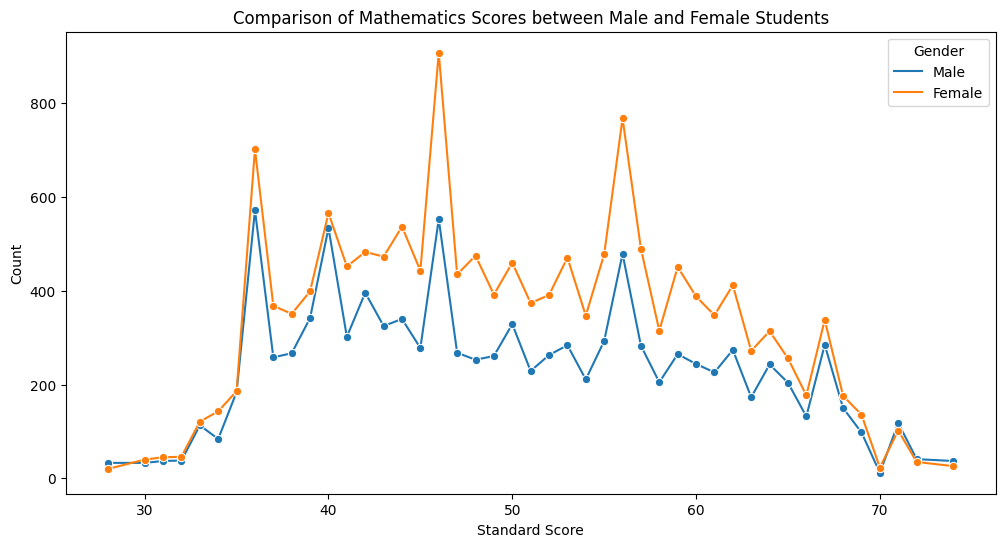

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 칼럼 이름을 영어로 변경
data.rename(columns={'영역': 'Subject', '유형': 'Type', '표준점수': 'Standard Score', '남자': 'Male', '여자': 'Female'}, inplace=True)

# 수학 영역 데이터 필터링
math_data = data[data['Type'] == '정치와 법']

# 그래프를 그리기 쉽게 데이터를 변형
math_melted = math_data.melt(id_vars=['Standard Score'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Count')

# 수학 점수에 대한 남녀 학생들의 비교를 선 그래프로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=math_melted, x='Standard Score', y='Count', hue='Gender', marker='o')
plt.title('Comparison of Mathematics Scores between Male and Female Students')
plt.xlabel('Standard Score')
plt.ylabel('Count')
plt.show()